In [1072]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Working with Text Lab
## Information retrieval, preprocessing, and feature extraction

In this lab, you'll be looking at and exploring European restaurant reviews. The dataset is rather tiny, but that's just because it has to run on any machine. In real life, just like with images, texts can be several terabytes long.

The dataset is located [here](https://www.kaggle.com/datasets/gorororororo23/european-restaurant-reviews) and as always, it's been provided to you in the `data/` folder.

### Problem 1. Read the dataset (1 point)
Read the dataset, get acquainted with it. Ensure the data is valid before you proceed.

How many observations are there? Which country is the most represented? What time range does the dataset represent?

Is the sample balanced in terms of restaurants, i.e., do you have an equal number of reviews for each one? Most importantly, is the dataset balanced in terms of **sentiment**?

In [1073]:
data = pd.read_csv('data/European Restaurant Reviews.csv')
data

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...
...,...,...,...,...,...,...
1497,Cuba,Old Square (Plaza Vieja),Negative,The Tourism Trap,Oct 2016 •,Despite the other reviews saying that this is ...
1498,Cuba,Old Square (Plaza Vieja),Negative,the beer factory,Oct 2016 •,beer is good. food is awfull The only decent...
1499,Cuba,Old Square (Plaza Vieja),Negative,brewery,Oct 2016 •,"for terrible service of a truly comedic level,..."
1500,Cuba,Old Square (Plaza Vieja),Negative,It's nothing exciting over there,Oct 2016 •,We visited the Havana's Club Museum which is l...


In [1074]:
print(f"Observation in the dataset are {len(data)}")

Observation in the dataset are 1502


In [1075]:
grouped_by_country = data.groupby('Country')
countries = grouped_by_country.size().sort_values(ascending=False)
countries = countries.reset_index(name='Count')
countries

,Country,Count
0,France,512
1,Italy,318
2,Morroco,210
3,Cuba,146
4,Poland,135
5,Russia,100
6,India,81


In [1076]:
most_represented_country = countries.index[0]
print(f"Most represented country is {most_represented_country}")

Most represented country is 0


In [1077]:
time_range = data[['Country', 'Review Date']]
time_range = time_range.copy()

In [1078]:
time_range

,Country,Review Date
0,France,May 2024 •
1,France,Feb 2024 •
2,France,Nov 2023 •
3,France,Mar 2023 •
4,France,Nov 2022 •
...,...,...
1497,Cuba,Oct 2016 •
1498,Cuba,Oct 2016 •
1499,Cuba,Oct 2016 •
1500,Cuba,Oct 2016 •


In [1079]:
time_range['Review Date'] = time_range['Review Date'].astype(str).str.replace('•', '', regex=False).str.strip()
time_range

,Country,Review Date
0,France,May 2024
1,France,Feb 2024
2,France,Nov 2023
3,France,Mar 2023
4,France,Nov 2022
...,...,...
1497,Cuba,Oct 2016
1498,Cuba,Oct 2016
1499,Cuba,Oct 2016
1500,Cuba,Oct 2016


In [1080]:
time_range['Review Date'] = time_range['Review Date'].str.replace('Sept', 'Sep', regex=False)
time_range['Review Date'] = pd.to_datetime(time_range['Review Date'], format='%b %Y', errors='coerce')

In [1081]:
print(f"The time range that dataset represent is between {str(time_range['Review Date'].min())[:7]} and {str(time_range['Review Date'].max())[:7]} \n"
      "in format Y and m"
      )

The time range that dataset represent is between 2010-09 and 2024-07 
in format Y and m


In [1082]:
data['Review Date'] = (
    data['Review Date']
    .astype(str)
    .str.replace('•', '', regex=False)
    .str.replace('Sept', 'Sep', regex=False)
    .str.strip()
)
data['Review Date'] = pd.to_datetime(data['Review Date'], format='%b %Y', errors='coerce')
data['Review Date'] = data['Review Date'].dt.to_period('M')
data

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,2024-05,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,2024-02,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,2023-11,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,2023-03,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,2022-11,From the start this meal was bad- especially g...
...,...,...,...,...,...,...
1497,Cuba,Old Square (Plaza Vieja),Negative,The Tourism Trap,2016-10,Despite the other reviews saying that this is ...
1498,Cuba,Old Square (Plaza Vieja),Negative,the beer factory,2016-10,beer is good. food is awfull The only decent...
1499,Cuba,Old Square (Plaza Vieja),Negative,brewery,2016-10,"for terrible service of a truly comedic level,..."
1500,Cuba,Old Square (Plaza Vieja),Negative,It's nothing exciting over there,2016-10,We visited the Havana's Club Museum which is l...


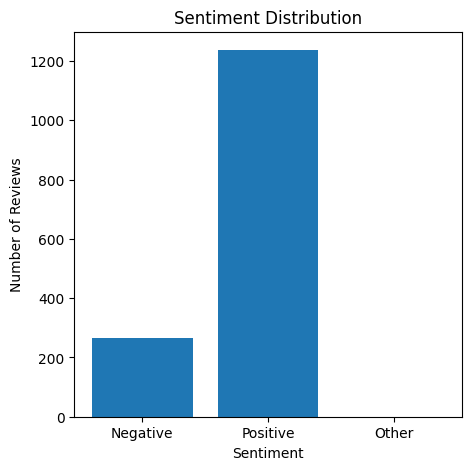

In [1083]:
negative_sentiment = []
positive_sentiment = []
other = []

for x in data['Sentiment']:
    if x == 'Negative':
        negative_sentiment.append(x)
    elif x == 'Positive':
        positive_sentiment.append(x)
    else:
        other.append(x)

counts = [len(negative_sentiment), len(positive_sentiment), len(other)]
labels = ['Negative', 'Positive', 'Other']

plt.figure(figsize=(5, 5))
plt.bar(labels, counts)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

### Problem 2. Getting acquainted with reviews (1 point)
Are positive comments typically shorter or longer? Try to define a good, robust metric for "length" of a text; it's not necessary just the character count. Can you explain your findings?

In [1084]:
data

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,2024-05,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,2024-02,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,2023-11,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,2023-03,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,2022-11,From the start this meal was bad- especially g...
...,...,...,...,...,...,...
1497,Cuba,Old Square (Plaza Vieja),Negative,The Tourism Trap,2016-10,Despite the other reviews saying that this is ...
1498,Cuba,Old Square (Plaza Vieja),Negative,the beer factory,2016-10,beer is good. food is awfull The only decent...
1499,Cuba,Old Square (Plaza Vieja),Negative,brewery,2016-10,"for terrible service of a truly comedic level,..."
1500,Cuba,Old Square (Plaza Vieja),Negative,It's nothing exciting over there,2016-10,We visited the Havana's Club Museum which is l...


In [1085]:
grouped_by_sentiment = data.groupby('Sentiment')
sentiment = grouped_by_sentiment.size().sort_values(ascending=False)
sentiment = sentiment.reset_index(name='Sentiment Count')
sentiment

,Sentiment,Sentiment Count
0,Positive,1237
1,Negative,265


In [1086]:
reviews_with_positive_sentiment = data[data['Sentiment'] == 'Positive']['Review'].tolist()
reviews_with_negative_sentiment = data[data['Sentiment'] == 'Negative']['Review'].tolist()

In [1087]:
mean_positive_review_length = np.mean([len(r.split()) for r in reviews_with_positive_sentiment])
mean_positive_review_length

np.float64(50.18350848827809)

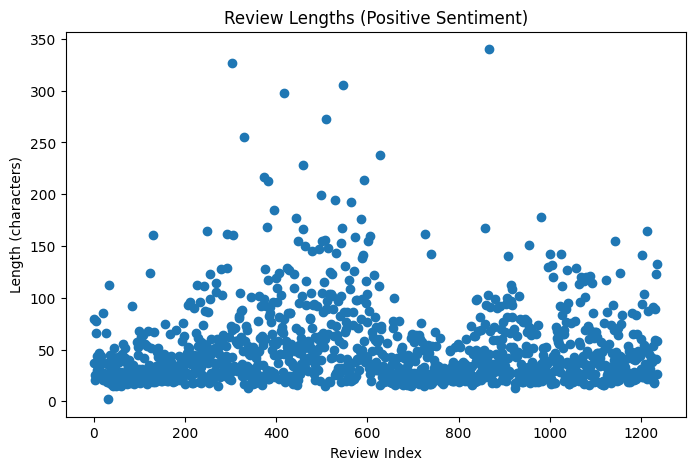

In [1088]:
length_of_reviews = [len(r.split()) for r in reviews_with_positive_sentiment]

plt.figure(figsize=(8, 5))
plt.scatter(range(len(length_of_reviews)), length_of_reviews)
plt.title('Review Lengths (Positive Sentiment)')
plt.xlabel('Review Index')
plt.ylabel('Length (characters)')
plt.show()

In [1089]:
mean_negative_review_length = np.mean([len(r.split()) for r in reviews_with_negative_sentiment])
mean_negative_review_length

np.float64(140.57358490566037)

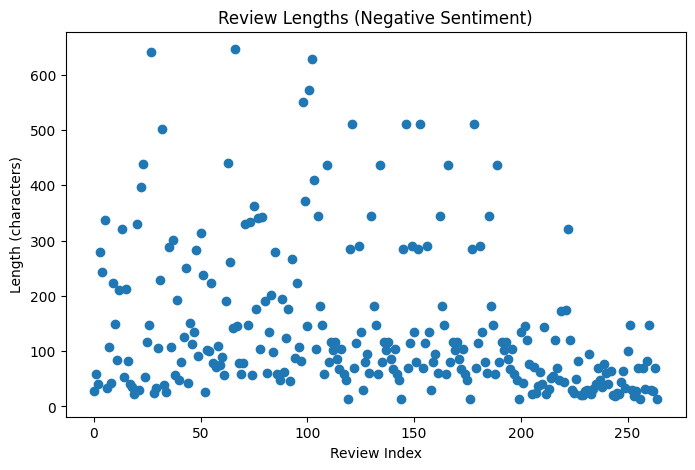

In [1090]:
length_of_reviews = [len(r.split()) for r in reviews_with_negative_sentiment]

plt.figure(figsize=(8, 5))
plt.scatter(range(len(length_of_reviews)), length_of_reviews)
plt.title('Review Lengths (Negative Sentiment)')
plt.xlabel('Review Index')
plt.ylabel('Length (characters)')
plt.show()

In [1091]:
reviews_with_positive_sentiment

['We booked the Frog in advance and pleased we did as it was very busy…\nGreat bar to visit before the Green Day gig and they were playing all the Green Days song while we were there… Great choice of food and drinks and the staff were very friendly and helpful… Would definitely recommend this bar if you are in the area. Thanks to all at the Frog for an enjoyable visit… By the way Green Day were fab…',
 'Great atmosphere, very popular bar + restaurant + micro-brewery and we had a lovely evening. The beer & food were excellent and there was something for everyone. On top of that, Frog is in a terrific location.',
 'Nice little place at Bercy Village. Lovely service by Sushant,  great lemonade homemade as well! We will be coming back :)',
 'Great place to hang out with friends for drinks. I love the Monaco beer here. Special thanks to our waitress Ellen for her excellent service.',
 'I tried Frog for the first time since my hotel was near by and I must say I was very impressed with the fo

In [1092]:
reviews_with_negative_sentiment

['The manager became agressive when I said the carbonara was not good. She was rude. It was  a very bad experience. The worst in Rome in many years.',
 'I ordered a beef fillet ask to be done medium, I got it well done cooked and very dry, when I told them they took the steak and after 20 minutes they brought me another steak that was completely rare, I left all the steak , and they asked me about it but charged me the fool price.',
 'This is an attractive venue with welcoming, albeit but somewhat slow service. The offerings are pleasingly presented but most everything has no taste. It was as though ingredients were just assembled without seasoning: a lovely restaurant, except for the food.',
 'Sadly I  used the high TripAdvisor rating too literally. We have been fortunate to eat at a number of fine restaurants so  know that amazing buzz from  a mouthful of fine freshly cooked food from a great chef.\nNever before have we eaten a tasting menu and never will we again.\nAd Hoc has a grea

In [1093]:
#Positive reviews
words_in_positive_reviews = []
for review in reviews_with_positive_sentiment:
    regex = r'\W+'
    cleaned = re.sub(regex, ' ', review).strip()
    token = cleaned.split(' ')
    words_in_positive_reviews.append(token)
    
all_positive_reviews_words = [word.lower() for review in words_in_positive_reviews for word in review]    
Counter(all_positive_reviews_words)

Counter({'the': 3379,
         'and': 2924,
         'a': 1810,
         'was': 1323,
         'to': 1259,
         'we': 1140,
         'of': 1069,
         'in': 842,
         'i': 755,
         'is': 746,
         'food': 741,
         'for': 720,
         'very': 695,
         'with': 673,
         'it': 588,
         'great': 572,
         'service': 539,
         'were': 518,
         'good': 514,
         'had': 488,
         'this': 455,
         'you': 412,
         'our': 389,
         'place': 374,
         'restaurant': 358,
         'on': 328,
         'my': 327,
         'at': 317,
         'nice': 308,
         'as': 297,
         'but': 292,
         'are': 285,
         'all': 282,
         'so': 270,
         'staff': 258,
         'from': 257,
         'that': 253,
         'they': 251,
         'wine': 240,
         'have': 236,
         'menu': 235,
         'friendly': 234,
         'excellent': 233,
         'delicious': 224,
         'really': 217,
         'the

In [1094]:
#Positive reviews without stopwords
stop_words = stopwords.words('english')
words_without_stop_words_in_positive_reviews = [word for word in all_positive_reviews_words if word not in stop_words ]
Counter(words_without_stop_words_in_positive_reviews)

Counter({'food': 741,
         'great': 572,
         'service': 539,
         'good': 514,
         'place': 374,
         'restaurant': 358,
         'nice': 308,
         'staff': 258,
         'wine': 240,
         'menu': 235,
         'friendly': 234,
         'excellent': 233,
         'delicious': 224,
         'really': 217,
         'us': 212,
         'amazing': 195,
         'recommend': 192,
         'atmosphere': 185,
         'time': 179,
         'would': 176,
         'lovely': 174,
         'back': 168,
         'rome': 168,
         'well': 167,
         'best': 167,
         'also': 154,
         'experience': 151,
         'one': 147,
         'visit': 145,
         'beer': 144,
         'dinner': 120,
         'highly': 119,
         'definitely': 117,
         'hoc': 117,
         'go': 116,
         'ad': 115,
         'meal': 114,
         'wonderful': 111,
         'music': 104,
         'went': 103,
         'made': 99,
         'evening': 93,
         'night

In [1095]:
#Negative reviews
words_in_negative_reviews = []
for review in reviews_with_negative_sentiment:
    regex = r'\W+'
    cleaned = re.sub(regex, ' ', review).strip()
    token = cleaned.split(' ')
    words_in_negative_reviews.append(token)
    
all_negative_reviews_words = [word.lower() for review in words_in_negative_reviews for word in review]    
Counter(all_negative_reviews_words)

Counter({'the': 2195,
         'and': 1169,
         'to': 932,
         'was': 904,
         'we': 876,
         'a': 871,
         'of': 653,
         'i': 613,
         'for': 532,
         'it': 510,
         'in': 494,
         'were': 399,
         'but': 370,
         'not': 365,
         'that': 360,
         'with': 326,
         'our': 313,
         'this': 312,
         'had': 310,
         'they': 282,
         'at': 280,
         'is': 262,
         'on': 259,
         'food': 247,
         'as': 222,
         't': 215,
         'have': 211,
         'very': 209,
         'us': 205,
         'my': 199,
         'restaurant': 185,
         'wine': 175,
         'so': 165,
         'all': 162,
         'good': 153,
         'you': 151,
         'be': 149,
         'there': 149,
         'service': 147,
         'table': 147,
         'one': 134,
         'menu': 133,
         'would': 127,
         'an': 117,
         'no': 117,
         'which': 117,
         'are': 116,
  

In [1096]:
#Negative reviews without stopwords
stop_words = stopwords.words('english')
words_without_stop_words_in_negative_reviews = [word for word in all_negative_reviews_words if word not in stop_words ]
Counter(words_without_stop_words_in_negative_reviews)

Counter({'food': 247,
         'us': 205,
         'restaurant': 185,
         'wine': 175,
         'good': 153,
         'service': 147,
         'table': 147,
         'one': 134,
         'menu': 133,
         'would': 127,
         'rome': 107,
         'place': 99,
         'meal': 96,
         'nice': 88,
         'could': 87,
         'like': 87,
         'waitress': 86,
         'really': 86,
         'ad': 85,
         'time': 85,
         'asked': 83,
         'hoc': 83,
         'even': 73,
         'minutes': 72,
         'tasting': 72,
         'took': 71,
         'truffle': 68,
         'many': 67,
         'made': 67,
         'restaurants': 66,
         'go': 66,
         'reviews': 66,
         'course': 65,
         'main': 63,
         'night': 62,
         'served': 62,
         'evening': 62,
         'well': 60,
         'never': 60,
         'reservation': 60,
         'glass': 60,
         'next': 59,
         'average': 58,
         'left': 54,
         'said

In [1097]:
count_vectorizer = CountVectorizer(stop_words = 'english')
sparse_matrix = count_vectorizer.fit_transform(data.Review)

In [1098]:
count_vectorizer.vocabulary_

{'manager': 3231,
 'agressive': 245,
 'said': 4558,
 'carbonara': 930,
 'good': 2424,
 'rude': 4529,
 'bad': 560,
 'experience': 2019,
 'worst': 5934,
 'rome': 4502,
 'years': 5964,
 'ordered': 3672,
 'beef': 623,
 'fillet': 2148,
 'ask': 456,
 'medium': 3305,
 'got': 2434,
 'cooked': 1338,
 'dry': 1772,
 'told': 5407,
 'took': 5418,
 'steak': 5079,
 '20': 48,
 'minutes': 3377,
 'brought': 819,
 'completely': 1249,
 'rare': 4235,
 'left': 3056,
 'asked': 457,
 'charged': 1033,
 'fool': 2236,
 'price': 4073,
 'attractive': 510,
 'venue': 5719,
 'welcoming': 5854,
 'albeit': 260,
 'somewhat': 4892,
 'slow': 4851,
 'service': 4722,
 'offerings': 3625,
 'pleasingly': 3966,
 'presented': 4058,
 'taste': 5280,
 'ingredients': 2786,
 'just': 2928,
 'assembled': 465,
 'seasoning': 4659,
 'lovely': 3175,
 'restaurant': 4420,
 'food': 2231,
 'sadly': 4551,
 'used': 5657,
 'high': 2606,
 'tripadvisor': 5506,
 'rating': 4239,
 'literally': 3121,
 'fortunate': 2261,
 'eat': 1805,
 'number': 3580,
 

In [1099]:
#Just check the counter of the words
data['Review'].iloc[1233]

"Just walking by we liked the look and it didn't disappoint us.  A small place with interesting and colourful decor.  We were shown up to the 'loft' part which is small but fun.  The food was brilliant and cheap.  We had octopus and calamari cooked to perfection.  Not a rubbery bit in site.  There is no alcohol here which isn't a bad thing to cut back on once holiday.  BUT you must try the carrot and ginger drink.  Freshly squeezed/blended etc.  So refreshing, tasty and almost a meal in itself.  The staff were charming.  It also looked as though it is a great place for single people to eat.  We saw a few there happily alone and smiling.  Try it."

In [1100]:
#Checking 1233 row and 5554 feature. The word is "The" and this word is repeated 5 times.
sparse_matrix[1233, 5554]

np.int64(0)

In [1101]:
counter = 0
words = [data['Review'].iloc[1233].split(' ')]
for x in words[0]:
    if x.lower() == 'the':
        counter += 1

Counter(words[0])
# Lowercase 3 times and uppercase 2 times

Counter({'': 13,
         'and': 7,
         'a': 5,
         'to': 4,
         'the': 3,
         'We': 3,
         'is': 3,
         'it': 2,
         'small': 2,
         'place': 2,
         'were': 2,
         'which': 2,
         'The': 2,
         'in': 2,
         'Just': 1,
         'walking': 1,
         'by': 1,
         'we': 1,
         'liked': 1,
         'look': 1,
         "didn't": 1,
         'disappoint': 1,
         'us.': 1,
         'A': 1,
         'with': 1,
         'interesting': 1,
         'colourful': 1,
         'decor.': 1,
         'shown': 1,
         'up': 1,
         "'loft'": 1,
         'part': 1,
         'but': 1,
         'fun.': 1,
         'food': 1,
         'was': 1,
         'brilliant': 1,
         'cheap.': 1,
         'had': 1,
         'octopus': 1,
         'calamari': 1,
         'cooked': 1,
         'perfection.': 1,
         'Not': 1,
         'rubbery': 1,
         'bit': 1,
         'site.': 1,
         'There': 1,
         'no':

In [1102]:
data_with_sentiment_and_reviews = data[['Sentiment', 'Review']]
data_with_sentiment_and_reviews

,Sentiment,Review
0,Negative,The manager became agressive when I said the c...
1,Negative,"I ordered a beef fillet ask to be done medium,..."
2,Negative,"This is an attractive venue with welcoming, al..."
3,Negative,Sadly I used the high TripAdvisor rating too ...
4,Negative,From the start this meal was bad- especially g...
...,...,...
1497,Negative,Despite the other reviews saying that this is ...
1498,Negative,beer is good. food is awfull The only decent...
1499,Negative,"for terrible service of a truly comedic level,..."
1500,Negative,We visited the Havana's Club Museum which is l...


In [1103]:
negative = data_with_sentiment_and_reviews[data_with_sentiment_and_reviews['Sentiment'] == 'Negative']['Review'].tolist()
positive = data_with_sentiment_and_reviews[data_with_sentiment_and_reviews['Sentiment'] == 'Positive']['Review'].tolist()

counter = 0
for r in negative:
    words = r.split()
    for w in words:
        if w.lower() not in stop_words:
            counter += 1

avg_non_stop_words = counter / len(negative)
avg_non_stop_words

71.35471698113207

In [1104]:
counter = 0
for r in positive:
    words = r.split()
    for w in words:
        if w.lower() not in stop_words:
            counter += 1

average_non_stop_words = counter / len(positive)
average_non_stop_words

27.954729183508487

In [1105]:
mean_negative_review_length

np.float64(140.57358490566037)

In [1106]:
mean_positive_review_length

np.float64(50.18350848827809)

##### At the beginning of the task we find the mean length of the negative sentiment reviews and positive sentiment reviews. 
##### The mean value was: 
##### Negative sentiment review length: ~ 140
##### Positive sentiment review length: ~ 50
##### Now we removed the stopwords from every review and the values are:
##### Negative: ~ 71
##### Positive: ~ 28

In [1107]:
stop_words_percent_in_negative_sentiment_reviews = round(((140 - 71) / 140) * 100, 2)
stop_words_percent_in_positive_sentiment_reviews = round(((50 - 28) / 50) * 100, 2)

In [1108]:
stop_words_percent_in_negative_sentiment_reviews

49.29

In [1109]:
stop_words_percent_in_positive_sentiment_reviews

44.0

### TF-IDF Method

In [1110]:
tfidf = TfidfVectorizer(stop_words='english', 
                        min_df=2, 
                        max_df=0.99,
                        ngram_range=(1, 2)
                        )
tfidf.fit_transform(data.Review)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 17833 stored elements and shape (1502, 4778)>

In [1111]:
tfidf.vocabulary_

{'bad experience': 298,
 'rome years': 3538,
 'ordered beef': 2827,
 'beef fillet': 335,
 'told took': 4233,
 '20 minutes': 33,
 'slow service': 3809,
 'lovely restaurant': 2405,
 'restaurant food': 3383,
 'tripadvisor rating': 4300,
 'freshly cooked': 1576,
 'cooked food': 710,
 'food great': 1468,
 'tasting menu': 4120,
 'ad hoc': 88,
 'hoc great': 1976,
 'great ambience': 1789,
 'attentive friendly': 255,
 'friendly service': 1606,
 'paired wines': 2857,
 'course food': 761,
 'food certainly': 1439,
 'plate food': 3014,
 'food hot': 1472,
 'serving staff': 3765,
 'staff great': 3927,
 'great wine': 1860,
 'offered tasting': 2781,
 'menu looked': 2547,
 'looked good': 2342,
 'good value': 1765,
 'wine asked': 4657,
 'great english': 1806,
 'probably best': 3127,
 'tasting menus': 4121,
 'wine selection': 4689,
 'maybe cheese': 2477,
 'poor choice': 3055,
 'given price': 1667,
 'birthday recommended': 424,
 'recommended local': 3297,
 'truffle menu': 4314,
 'single table': 3794,
 'tab

### Problem 3. Preprocess the review content (2 points)
You'll likely need to do this while working on the problems below, but try to synthesize (and document!) your preprocessing here. Your tasks will revolve around words and their connection to sentiment. While preprocessing, keep in mind the domain (restaurant reviews) and the task (sentiment analysis).

### Problem 3. Top words (1 point)
Use a simple word tokenization and count the top 10 words in positive reviews; then the top 10 words in negative reviews*. Once again, try to define what "top" words means. Describe and document your process. Explain your results.

\* Okay, you may want to see top N words (with $N \ge 10$).

### Problem 4. Review titles (2 point)
How do the top words you found in the last problem correlate to the review titles? Do the top 10 words (for each sentiment) appear in the titles at all? Do reviews which contain one or more of the top words have the same words in their titles?

Does the title of a comment present a good summary of its content? That is, are the titles descriptive, or are they simply meant to catch the attention of the reader?

### Problem 5. Bag of words (1 point)
Based on your findings so far, come up with a good set of settings (hyperparameters) for a bag-of-words model for review titles and contents. It's easiest to treat them separately (so, create two models); but you may also think about a unified representation. I find the simplest way of concatenating the title and content too simplistic to be useful, as it doesn't allow you to treat the title differently (e.g., by giving it more weight).

The documentation for `CountVectorizer` is [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Familiarize yourself with all settings; try out different combinations and come up with a final model; or rather - two models :).

### Problem 6. Deep sentiment analysis models (1 point)
Find a suitable model for sentiment analysis in English. Without modifying, training, or fine-tuning the model, make it predict all contents (or better, combinations of titles and contents, if you can). Meaure the accuracy of the model compared to the `sentiment` column in the dataset.

### Problem 7. Deep features (embeddings) (1 point)
Use the same model to perform feature extraction on the review contents (or contents + titles) instead of direct predictions. You should already be familiar how to do that from your work on images.

Use the cosine similarity between texts to try to cluster them. Are there "similar" reviews (you'll need to find a way to measure similarity) across different restaurants? Are customers generally in agreement for the same restaurant?

### \* Problem 8. Explore and model at will
In this lab, we focused on preprocessing and feature extraction and we didn't really have a chance to train (or compare) models. The dataset is maybe too small to be conclusive, but feel free to play around with ready-made models, and train your own.